# Лабораторная работа №2

ФИО:   Людофа Елена Анатольевна

Группа: БИВТ-23-СП-1

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №6

Что необходимо сделать:  
**В общих чертах просто провести EDA** (но обычно это не бывает просто)
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/1NOE0D4JQgD6LbvUqWboUI1TFj4P87ugbqUTDquxlGEI/edit?usp=sharing) необходимо узнать название своего датасета
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1sbsjBsJ_ln0XgXCI9R6s17pvyvApgcwF?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. **Найти** в таблице (из исходных данных) название своего датасета
2. **Описать** кратко постановку задачи, что от вас хотят. Какие есть переменные. Целевое событие непрерывно (предсказываем число от -$\infty$ до $\infty$) либо дискретно (предсказываем класс из конечного множества вариантов, например 0 или 1, или какое-то число в диапазоне [0; 10])
3. Построить распределение целевой переменной в виде гистограммы, сделать промежуточные выводы (обратите внимание на однородоность распределения и возможный дисбаланс). Посчитайте количество уникальных значений целевой переменной.
4. Выведите основные статистики по переменным в датасете (для этого есть готовый метод в pandas, он считает count, min, max, mean, 25%, 50% и пр.). Это делается **одним** методом (вы его знаете).
5. Выведите основную информацию по датасету (сколько всего колонок, каких они типов, сколько в них non-null элементов). Это делается **одним** методом (вы его знаете).
6. Посчитайте количество пропусков (NaN, Null, null, None) элементов во всех колонках. Предположите, почему эти пропуски могли возникнуть, и как их можно было бы заменить.
7. Постройте гистограммы 5 любых признаков (из множества `X`, или как оно изначально у нас называется `data.data`). Если видите какое-то смещение, несимметричность и прочее, опишите это словами в ноутбуке.
8. Постройте графики зависимости 5 любых (на ваш выбор) переменных от целевой переменной (если переменных меньше, чем 5, то сделайте столько, сколько получится). Сделайте вывод, можно ли использовать эти переменные для прогнозирования целевой переменной (иначе говоря, есть ли какая-то взаимосвязь между y-переменной и X-переменной)  
9. _extra_ (необязательно). Посмотрите на зависимость двух переменных одновременно от целевой переменной. То есть по оси OX должна быть переменная $X_{n}$, по оси OY -- переменная $X_{k}$. И у вас будет две кривые (два облака точек) в разрезе целевой переменной. Либо вы можете построить похожее для категориальных признаков, но необходимо будет прочитать про heatmap.

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

## 1. Импорта данных

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/marketing_campaign.csv', sep='\t')  # если нужно, можно поменять разделитель

print("Размер датасета:", data.shape)
print("\nПервые 5 строк:")
print(data.head())

Размер датасета: (2240, 29)

Первые 5 строк:
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCm

## 2. Описание постановки задачи

Прогнозирование отклика клиентов на маркетинговую кампанию на основе их демографических характеристик и покупательского поведения.

**Тип задачи:** Бинарная классификация

**Целевая переменная:**

- Response - отклик на маркетинговую кампанию

- Дискретная переменная, принимающая значения 0 или 1 (0 = клиент не отреагировал на кампанию;
1 = клиент отреагировал на кампанию)

## 3. Распределение целевой переменной

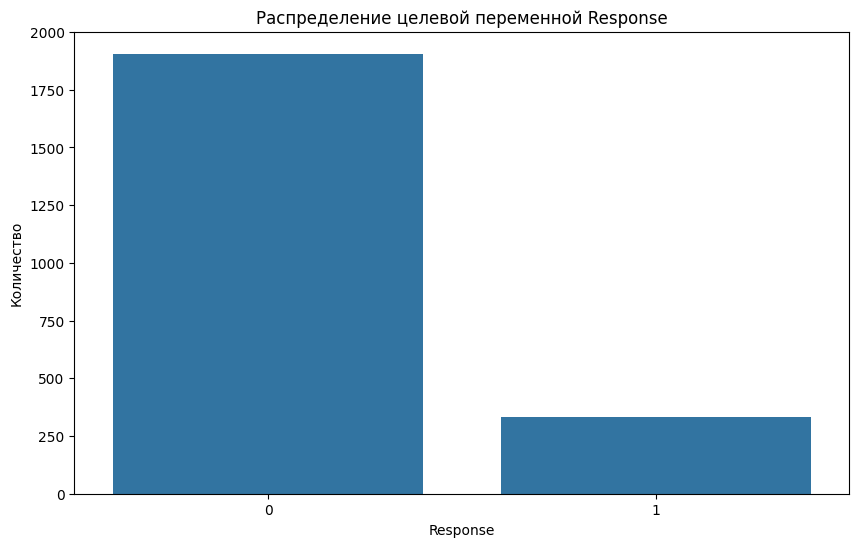

In [10]:
# Распределение целевой переменной
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Response')
plt.title('Распределение целевой переменной Response')
plt.xlabel('Response')
plt.ylabel('Количество')
plt.show()

In [11]:
# Статистика по целевой переменной
response_stats = data['Response'].value_counts()
print("Распределение Response:")
print(response_stats)
print(f"\nКоличество уникальных значений: {data['Response'].nunique()}")
print(f"Дисбаланс классов: {response_stats[0]/response_stats[1]:.2f}:1")


Распределение Response:
Response
0    1906
1     334
Name: count, dtype: int64

Количество уникальных значений: 2
Дисбаланс классов: 5.71:1


 ## 4. Основные статистики по переменным

In [16]:
# Основные статистики
print("Основные статистики по числовым переменным:")
data.describe()

Основные статистики по числовым переменным:


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [12]:
# Для категориальных переменных
print("Статистики по категориальным переменным:")
categorical_cols = ['Education', 'Marital_Status']
for col in categorical_cols:
    print(f"\n{col}:")
    print(data[col].value_counts())

Статистики по категориальным переменным:

Education:
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

Marital_Status:
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


##5. Основная информация о датасете



In [13]:
print("Информация о датасете:")
data.info()

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchas

##6. Анализ пропущенных значений


In [14]:
# Пропущенные значения
missing_values = data.isnull().sum()
missing_percent = (data.isnull().sum() / len(data)) * 100

missing_df = pd.DataFrame({
    'Количество пропусков': missing_values,
    'Процент пропусков': missing_percent
})

print("Пропущенные значения:")
missing_df[missing_df['Количество пропусков'] > 0]

Пропущенные значения:


,Количество пропусков,Процент пропусков
Income,24,1.071429


## Анализ возможных причин пропусков в данных

## Причины пропусков в переменной Income (доход):

1. Отказ клиента предоставить информацию

2. Ошибки при сборе и обработке данных

3. Особые статусы клиентов

4. Маркетинговые и и стратегические причины

### Возможные способы обработки пропусков:

1. Статистическая импутация

2. Алгоритмические методы импутации

3. Создание дополнительных признаков

4. Стратегические подходы

5. Business-ориентированные решения

## 7. Гистограммы 5 случайных признаков


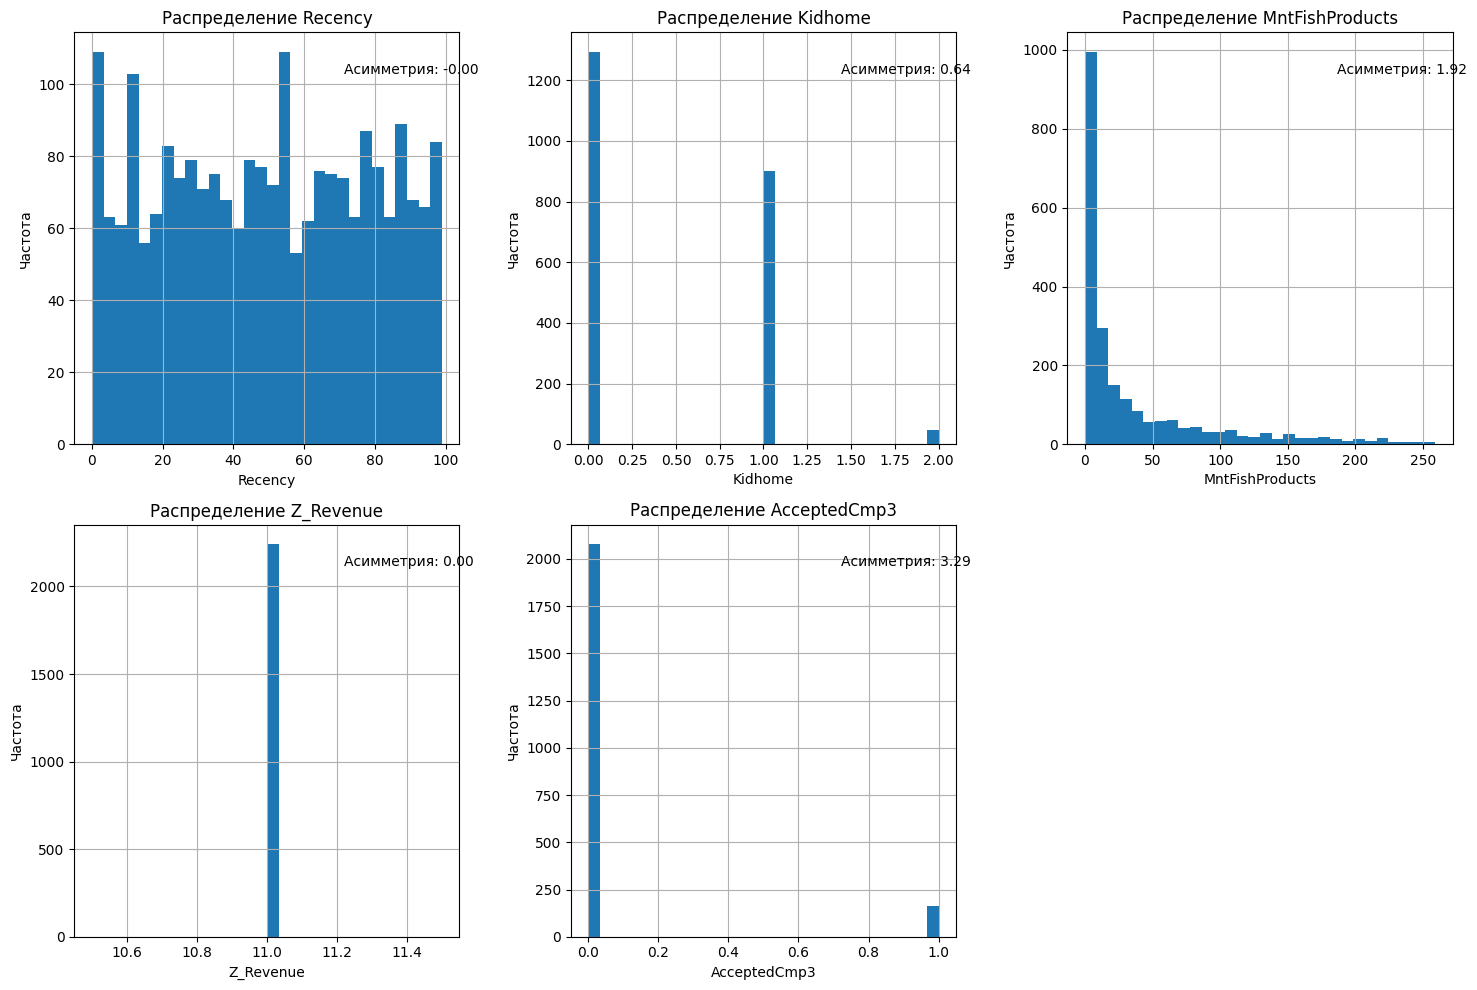

Анализ распределений:
Recency: Близкое к нормальному распределение (асимметрия = -0.00)
Kidhome: Умеренно асимметричное распределение (асимметрия = 0.64)
MntFishProducts: Сильно асимметричное распределение (асимметрия = 1.92)
Z_Revenue: Близкое к нормальному распределение (асимметрия = 0.00)
AcceptedCmp3: Сильно асимметричное распределение (асимметрия = 3.29)


In [17]:
# Выбор 5 случайных числовых признаков (исключая ID и целевую переменную)
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ['ID', 'Response']]
selected_cols = np.random.choice(numeric_cols, 5, replace=False)

# Построение гистограмм
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(selected_cols):
    data[col].hist(bins=30, ax=axes[i])
    axes[i].set_title(f'Распределение {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Частота')

    # Анализ распределения
    skewness = data[col].skew()
    axes[i].text(0.7, 0.9, f'Асимметрия: {skewness:.2f}',
                transform=axes[i].transAxes, fontsize=10)

# Удаление лишнего subplot
if len(selected_cols) < 6:
    for i in range(len(selected_cols), 6):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Анализ распределений
print("Анализ распределений:")
for col in selected_cols:
    skewness = data[col].skew()
    if abs(skewness) > 1:
        print(f"{col}: Сильно асимметричное распределение (асимметрия = {skewness:.2f})")
    elif abs(skewness) > 0.5:
        print(f"{col}: Умеренно асимметричное распределение (асимметрия = {skewness:.2f})")
    else:
        print(f"{col}: Близкое к нормальному распределение (асимметрия = {skewness:.2f})")

## 8. Зависимость переменных от целевой



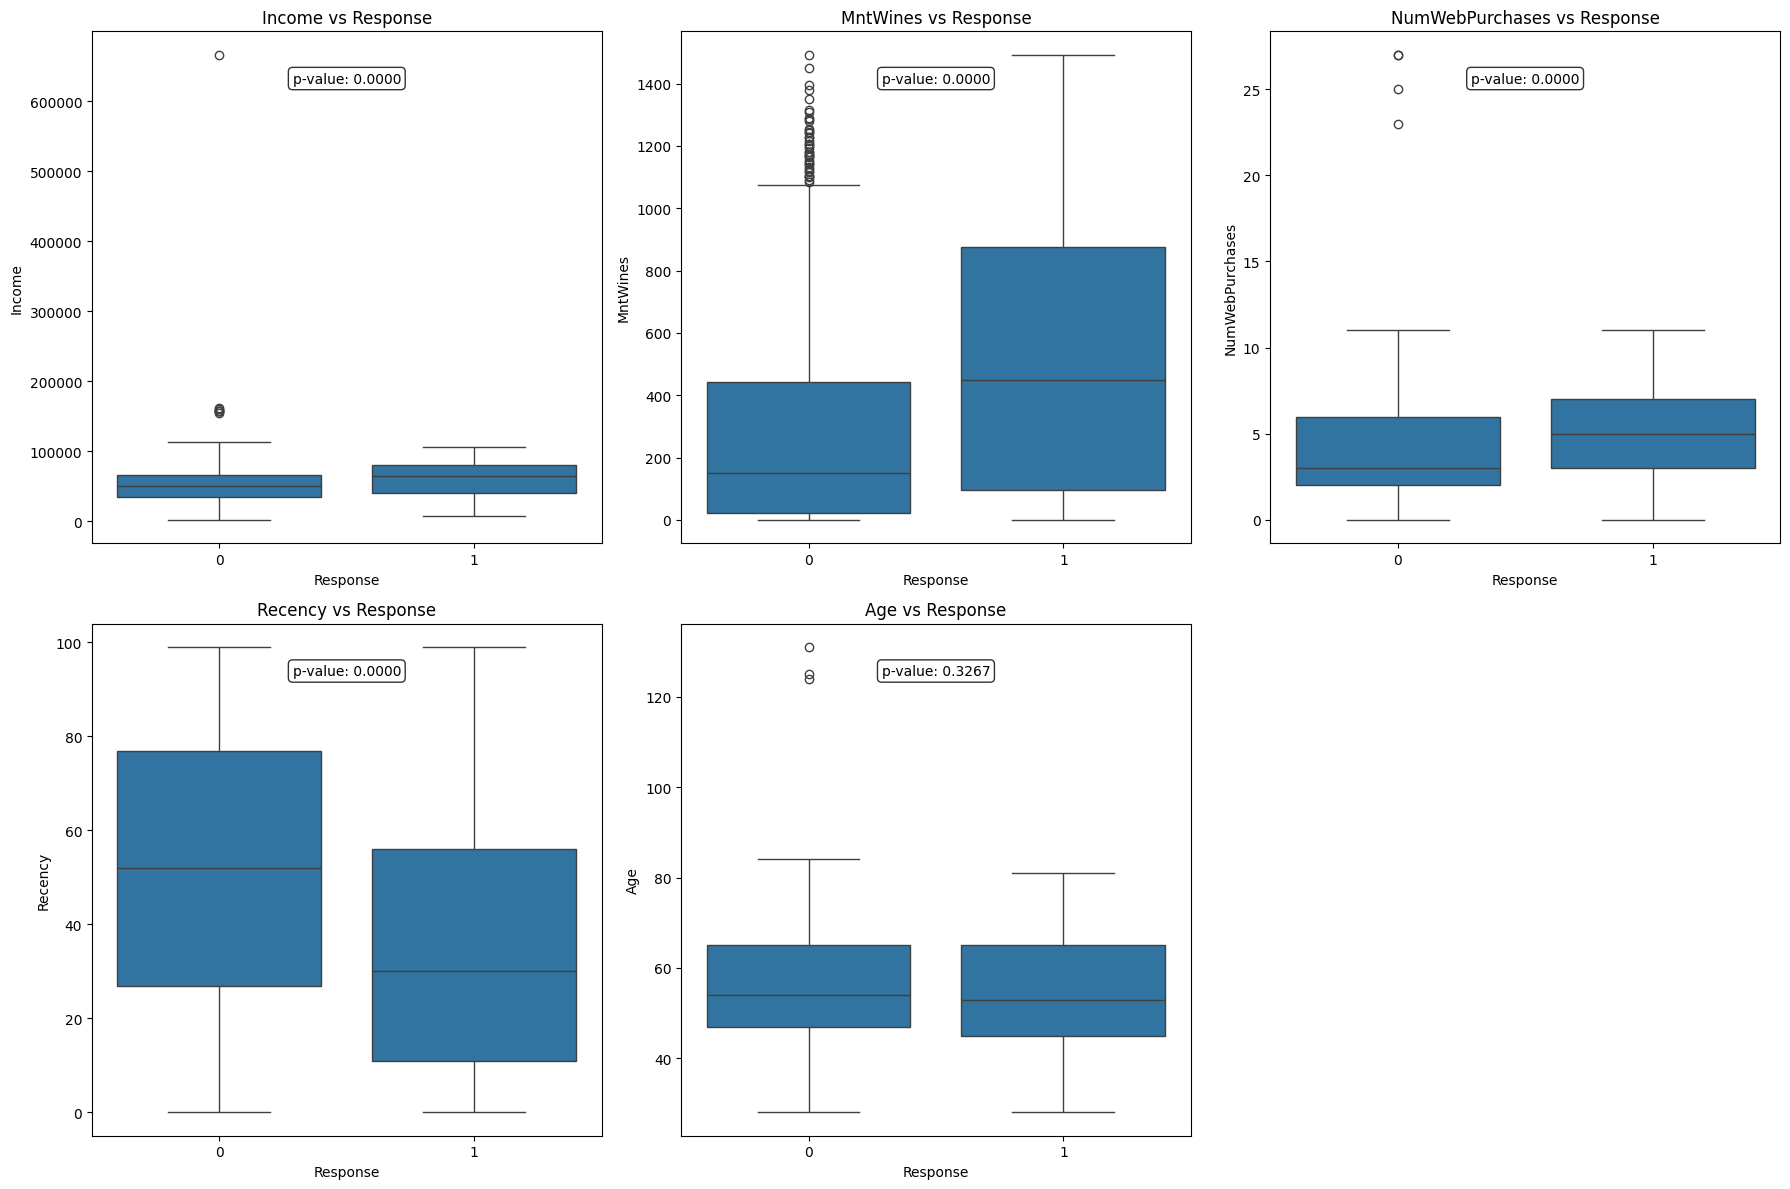

Выводы о взаимосвязи с целевой переменной:
Income: Среднее для Response=0: 50839.13, для Response=1: 60209.68
MntWines: Среднее для Response=0: 269.10, для Response=1: 502.70
NumWebPurchases: Среднее для Response=0: 3.91, для Response=1: 5.07
Recency: Среднее для Response=0: 51.51, для Response=1: 35.38
Age: Среднее для Response=0: 55.30, для Response=1: 54.58


In [18]:
# Выбор 5 переменных для анализа
analysis_cols = ['Income', 'MntWines', 'NumWebPurchases', 'Recency', 'Age']

# Создание возраста из года рождения
data['Age'] = 2024 - data['Year_Birth']

# Построение графиков
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(analysis_cols):
    if col in data.columns:
        # Boxplot для категориальной целевой переменной
        sns.boxplot(data=data, x='Response', y=col, ax=axes[i])
        axes[i].set_title(f'{col} vs Response')

        # Статистический тест
        group_0 = data[data['Response'] == 0][col].dropna()
        group_1 = data[data['Response'] == 1][col].dropna()

        from scipy.stats import mannwhitneyu
        stat, p_value = mannwhitneyu(group_0, group_1)
        axes[i].text(0.5, 0.9, f'p-value: {p_value:.4f}',
                    transform=axes[i].transAxes, ha='center', fontsize=10,
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# Удаление лишнего subplot
if len(analysis_cols) < 6:
    for i in range(len(analysis_cols), 6):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Выводы о взаимосвязи
print("Выводы о взаимосвязи с целевой переменной:")
for col in analysis_cols:
    if col in data.columns:
        mean_0 = data[data['Response'] == 0][col].mean()
        mean_1 = data[data['Response'] == 1][col].mean()
        print(f"{col}: Среднее для Response=0: {mean_0:.2f}, для Response=1: {mean_1:.2f}")



1. **Задача** - предсказать, откликнется ли клиент на рекламу (да/нет)

2. **Проблемы в данных:**
   - Мало откликнувшихся (дисбаланс)
   - Есть пропуски в доходах
   - Данные скошены (большинство мало тратит)

3. **Что делать:**
   - Заполнить пропуски в доходах
   - Сбалансировать классы
   - Выровнять распределения (логарифм)
   - Выбрать самые важные признаки

4. **Перспективы** - данные показывают, что можно построить работающую модель, так как есть признаки, которые отличают откликнувшихся от неоткликнувшихся.